In [1]:
import json
import pandas as pd

In [161]:
with open("transcript_analysis_sections.json") as f:
    data = json.load(f)

In [221]:
def flatten(l):
    return l[0] if isinstance(l, list) and len(l) == 1 and isinstance(l[0], list) else l

flat_rows = []

for transcript in data:
    tid = transcript["transcript_id"]
    month = transcript["month"]
    location = transcript["location"]
    organization = transcript["organization"]
    education = transcript["education"]
    date = transcript["date"]
    for section in transcript["sections"]:
        agent_emotions = flatten(section.get("speaker emotion", []))
        prospect_emotions = flatten(section.get("prospect emotion", []))
        row = {
            "transcript_id": tid,
            "month": month,
            "location": ", ".join(map(str, location)),
            "education": ", ".join(map(str, education)),
            "organization": ", ".join(map(str, organization)),
            "date": ", ".join(map(str, date)),
            "phase": section.get("phase"),
            "agent_emotions": ", ".join(agent_emotions),
            "agent_emotion_scores": ", ".join(map(str, section.get("speaker emotion_score", []))),
            "agent_keywords": section.get("speaker keywords"),
            "agent_duration": section.get("speaker duration"),
            "prospect_emotions": ", ".join(prospect_emotions),
            "prospect_emotion_scores": ", ".join(map(str, section.get("prospect emotion_score", []))),
            "prospect_keywords": section.get("prospect keywords"),
            "prospect_duration": section.get("prospect duration"),
            "start_timestamp": section.get("start_timestamp"),
            "end_timestamp": section.get("end_timestamp")
        }
        flat_rows.append(row)
df = pd.DataFrame(flat_rows)

In [222]:
df['location'] = df['location'].apply(lambda x: 'No Info' if x == '' else x)
df['education'] = df['education'].apply(lambda x: 'No Info' if x == '' else x)
df['organization'] = df['organization'].apply(lambda x: 'No Info' if x == '' else x)
df['date'] = df['date'].apply(lambda x: 'No Info' if x == '' else x)

In [223]:
df['location'].value_counts()

location
No Info                                        714
India                                           42
Mumbai                                          35
UK                                              14
Delhi                                            7
Chhattisgarh, Gurgaon                            7
Venmat                                           7
Ahmedabad, India, Mumbai                         7
cont                                             7
AB                                               7
Clash                                            7
Jaipur                                           7
India, California                                7
Hindi                                            7
Kenya, Thailand                                  7
Reddit                                           7
Amruthai                                         7
Hyderabad, India, Delhi, US, Canada, Mumbai      7
US                                               7
Kalyan, RC            

In [224]:

df['agent_vs_prospect'] = df.apply(
    lambda row: row['agent_duration'] / row['prospect_duration']if row['prospect_duration'] != 0 else row['agent_duration'],axis=1
).apply(lambda x: f"{int(x)}:1")
df['agent_vs_prospect_num'] = df.apply(
    lambda row: int(row['agent_duration'] / row['prospect_duration']if row['prospect_duration'] != 0 else row['agent_duration']),axis=1
)
df

,transcript_id,month,location,education,organization,date,phase,agent_emotions,agent_emotion_scores,agent_keywords,agent_duration,prospect_emotions,prospect_emotion_scores,prospect_keywords,prospect_duration,start_timestamp,end_timestamp,agent_vs_prospect,agent_vs_prospect_num
0,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Introduction,"admiration, neutral","0.5375824570655823, 0.8193856477737427","yeah, GMAT Club, CAT, MAT, GMAT, India, CAT ex...",36,"approval, realization","0.578432559967041, 0.9898404479026794","Electronics and Communication, engineering in ...",6,00:00:02,00:04:02,6:1,6
1,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Prospect’s performance,"curiosity, neutral","0.94609135389328, 0.4366990625858307","GMAT, yeah, mock, mocks, verbal, planner, good...",108,"approval, optimism, neutral","0.7873460650444031, 0.4739095866680145, 0.5158...","language, quant, buy, strengths, planner, ques...",19,00:04:16,00:15:26,5:1,5
2,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Agent drawing up plan,"curiosity, neutral","0.7164213061332703, 0.47296738624572754","questions, Stage, verbal, mock, Module, quant,...",125,neutral,0.9929359555244446,"called number properties, number properties, q...",44,00:15:29,00:32:19,2:1,2
3,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Explaining product,neutral,0.807154655456543,"Stage, questions, cementing, quant, question, ...",287,"caring, neutral","0.8703191876411438, 0.5974591374397278","medium cementing, cementing quizzes, hard ceme...",9,00:32:24,01:00:46,31:1,31
4,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Price discussion,"optimism, realization","0.8690871000289917, 0.4004993140697479","month, mock, round, extension, month extension...",83,neutral,0.9880262613296509,"remain retain, months, Round, give, discount, ...",2,01:00:52,01:08:05,41:1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,9_20250106,Jan,Mumbai,No Info,GMAT,No Info,Agent drawing up plan,"approval, curiosity, neutral","0.614425778388977, 0.3361412286758423, 0.55269...","step, study plan, verbal, plan, study, time, s...",103,approval,0.9955644607543945,"Yeah, quals is fine, fine, quals",2,00:05:45,00:11:46,51:1,51
990,9_20250106,Jan,Mumbai,No Info,GMAT,No Info,Explaining product,"admiration, realization","0.9129942655563354, 0.959177553653717","Focus Edition, topic, announced in June, basic...",177,approval,0.9873191118240356,"remember sentence correction, Yeah, sentence c...",6,00:11:51,00:22:10,29:1,29
991,9_20250106,Jan,Mumbai,No Info,GMAT,No Info,Price discussion,neutral,0.9601899981498718,"front of instructor, enhanced experience, expe...",49,approval,0.967706561088562,"forward, start, correct, Yeah, structure",3,00:22:11,00:25:17,16:1,16
992,9_20250106,Jan,Mumbai,No Info,GMAT,No Info,Q&A,neutral,0.9942610263824463,"live session, live, sessions, session, months ...",48,"admiration, approval","0.8726662397384644, 0.8833647966384888","Yeah, questions, answers, nice",4,00:25:21,00:28:14,12:1,12


In [225]:
df['agent_vs_prospect_num'].value_counts()

agent_vs_prospect_num
2      83
3      74
6      70
4      64
5      64
       ..
82      1
108     1
90      1
36      1
142     1
Name: count, Length: 106, dtype: int64

In [226]:
df.describe()

,agent_duration,prospect_duration,agent_vs_prospect_num
count,994.000000,994.000000,994.000000
mean,72.575453,7.581489,18.472837
std,61.302453,6.672447,27.634752
min,4.000000,0.000000,0.000000
25%,28.000000,3.000000,4.000000
50%,55.000000,6.000000,8.000000
75%,93.000000,10.000000,20.000000
max,358.000000,46.000000,251.000000


In [227]:
ratio_by_phase = df.groupby('phase')['agent_vs_prospect_num'].agg(
    min='min',
    max='max',
    mean='mean',
    median='median',
    std='std'
).reset_index()

ratio_by_phase

,phase,min,max,mean,median,std
0,Agent drawing up plan,2,145,22.316901,11.0,27.001016
1,Explaining product,4,251,37.387324,18.5,49.308531
2,Introduction,0,51,5.035211,2.0,7.433308
3,Price discussion,3,110,28.563380,19.0,24.346047
4,Prospect’s performance,1,75,8.274648,6.0,9.906044
5,Q&A,2,109,18.429577,10.0,22.045857
6,Wrap,1,53,9.302817,5.0,11.693478


In [228]:
df.to_csv("transcript_analysis_sections.csv", index=False)

In [300]:
def pivot_transcript_sections(transcript):
    tid = transcript["transcript_id"]
    flat = {
        "transcript_id": tid,
    }

    # Keys you want to flatten like "phase: value" per field
    fields_to_extract = [
        ("agent_emotions_with_score", lambda s: ", ".join(
            f"{emo} - {round(float(score), 2)}"
            for emo, score in zip(
                flatten(s.get("speaker emotion", [])),
                flatten(s.get("speaker emotion_score", []))
            )
        )),
        ("agent_duration", lambda s: str(s.get("speaker duration", ""))),
        ("agent_keywords", lambda s: s.get("speaker keywords", "")),
        ("prospect_emotions_with_score", lambda s: ", ".join(
            f"{emo} - {round(float(score), 2)}"
            for emo, score in zip(
                flatten(s.get("prospect emotion", [])),
                flatten(s.get("prospect emotion_score", []))
            )
        )),
        ("prospect_duration", lambda s: str(s.get("prospect duration", ""))),
        ("prospect_keywords", lambda s: s.get("prospect keywords", "")),
        ("start_end_time", lambda s: f"{s.get('start_timestamp')} - {s.get('end_timestamp')}"),
        ("agent_vs_prospect_num", lambda s: (
            int(s.get('speaker duration', 0) / s.get('prospect duration', 1))
            if s.get('prospect duration', 1) != 0 else s.get('speaker duration', 0)
        ))
    ]

    # Process each field
    for new_col_name, extractor in fields_to_extract:
        lines = []
        for section in transcript["sections"]:
            phase = section.get("phase", "Unknown")
            val = extractor(section)
            lines.append(f"{phase}: {val}")
        flat[new_col_name] = "\n".join(lines)

    return flat


In [301]:
summary_df = pd.DataFrame([pivot_transcript_sections(t) for t in data])
summary_df

,transcript_id,agent_emotions_with_score,agent_duration,agent_keywords,prospect_emotions_with_score,prospect_duration,prospect_keywords,start_end_time,agent_vs_prospect_num
0,100_20250213,"Introduction: admiration - 0.54, neutral - 0.8...",Introduction: 36\nProspect’s performance: 108\...,"Introduction: yeah, GMAT Club, CAT, MAT, GMAT,...","Introduction: approval - 0.58, realization - 0...",Introduction: 6\nProspect’s performance: 19\nA...,"Introduction: Electronics and Communication, e...",Introduction: 00:00:02 - 00:04:02\nProspect’s ...,Introduction: 6\nProspect’s performance: 5\nAg...
1,101_20250212,"Introduction: admiration - 0.99, approval - 0....",Introduction: 26\nProspect’s performance: 104\...,"Introduction: plans with GMAT, GMAT, handle pu...","Introduction: admiration - 0.89, desire - 0.42...",Introduction: 16\nProspect’s performance: 20\n...,"Introduction: engineer by profession, basicall...",Introduction: 00:00:02 - 00:02:39\nProspect’s ...,Introduction: 1\nProspect’s performance: 5\nAg...
2,102_20250212,Introduction: curiosity - 0.98\nProspect’s per...,Introduction: 26\nProspect’s performance: 88\n...,"Introduction: Yeah, mute, scores, test, rememb...","Introduction: admiration - 0.36, approval - 0....",Introduction: 11\nProspect’s performance: 22\n...,"Introduction: quant, quant part, Yeah, quant s...",Introduction: 00:00:04 - 00:02:39\nProspect’s ...,Introduction: 2\nProspect’s performance: 4\nAg...
3,103_20250212,Introduction: neutral - 0.99\nProspect’s perfo...,Introduction: 30\nProspect’s performance: 101\...,"Introduction: clients outside Rome, Rome, Ital...","Introduction: desire - 0.71, optimism - 0.74, ...",Introduction: 8\nProspect’s performance: 14\nA...,"Introduction: corporate finance, teaching corp...",Introduction: 00:00:03 - 00:03:32\nProspect’s ...,Introduction: 3\nProspect’s performance: 7\nAg...
4,104_20250212,"Introduction: curiosity - 0.96, neutral - 0.54...",Introduction: 11\nProspect’s performance: 32\n...,"Introduction: Amruth, class, live class, phone...",Introduction: approval - 0.99\nProspect’s perf...,Introduction: 1\nProspect’s performance: 4\nAg...,"Introduction: Yeah, business laptop, laptop, b...",Introduction: 00:00:05 - 00:01:48\nProspect’s ...,Introduction: 11\nProspect’s performance: 8\nA...
...,...,...,...,...,...,...,...,...,...
137,96_20250211,"Introduction: admiration - 0.82, optimism - 0....",Introduction: 37\nProspect’s performance: 104\...,"Introduction: GMAT, start, Chicago Booth, earl...",Introduction: neutral - 0.99\nProspect’s perfo...,Introduction: 0\nProspect’s performance: 7\nAg...,Introduction: \nProspect’s performance: sectio...,Introduction: 00:00:02 - 00:02:26\nProspect’s ...,Introduction: 37\nProspect’s performance: 14\n...
138,97_20250212,Introduction: curiosity - 0.87\nProspect’s per...,Introduction: 25\nProspect’s performance: 97\n...,"Introduction: CAT and Zat, Zat, CAT, June, mon...","Introduction: approval - 0.68, realization - 0...",Introduction: 16\nProspect’s performance: 26\n...,"Introduction: CAT and Zat, preparing for CAT, ...",Introduction: 00:00:03 - 00:03:48\nProspect’s ...,Introduction: 1\nProspect’s performance: 3\nAg...
139,98_20250212,"Introduction: approval - 0.97, curiosity - 0.6...",Introduction: 15\nProspect’s performance: 48\n...,"Introduction: primary goal, top goal, goal, po...","Introduction: admiration - 0.99, approval - 0....",Introduction: 2\nProspect’s performance: 3\nAg...,"Introduction: good resume, year work experienc...",Introduction: 00:00:02 - 00:00:58\nProspect’s ...,Introduction: 7\nProspect’s performance: 16\nA...
140,99_20250211,"Introduction: approval - 0.5, neutral - 0.92\n...",Introduction: 14\nProspect’s performance: 47\n...,"Introduction: Yeah, worries, GMAT, Sir, MBA, t...","Introduction: remorse - 0.52, sadness - 0.88\n...",Introduction: 7\nProspect’s performance: 15\nA...,"Introduction: Yeah, working, score, bad, camer...",Introduction: 00:00:02 - 00:00:42\nProspect’s ...,Introduction: 2\nProspect’s performanc

## Hypothesis creation

In [274]:
H1_PROSPECT_POSITIVE = {"approval", "optimism", "realization", "hope", "confidence", "understanding", "exciting", "gratitude", "joy"}
H2_PROSPECT_NEGATIVE = {"awkward", "confusion", "stress", "neutral", "anger", "disappointment"}
H3_AGENT_POSITIVE = {"confidence", "relief", "admiration", "optimism"}
H4_SECTIONS_AGENT_DOMINANT = {"Agent drawing up plan", "Explaining product"}
H4_SECTIONS_PROSPECT_DOMINANT = {"Prospect’s performance", "Q&A"}

In [230]:
PHASE_THRESHOLDS = {
    "Agent drawing up plan": 11,
    "Explaining product": 18.5,
    "Prospect’s performance": 6,
    "Q&A": 10,
    "Wrap": 5
}

In [237]:
def parse_list_column(col):
    if isinstance(col, list):
        return col  # Already parsed
    if isinstance(col, str):
        return col.strip("[]").replace("'", "").split(", ")
    return []

df["agent_emotions"] = df["agent_emotions"].apply(parse_list_column)
df["prospect_emotions"] = df["prospect_emotions"].apply(parse_list_column)

def calculate_conversion_likelihood(group):
    score = 0
    reasons = []
    key_phases = []
    emotions_detected = []
    prospect_keywords = []

    wrap_section = group[group["phase"].isin(["Q&A", "Wrap"])]
    price_section = group[group["phase"] == "Price discussion"]

    # Hypothesis 1 Prospect's positive emotions in "Q&A" and "Wrap" phase
    h1_score = sum(1 for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)
    if h1_score > 1:
        score += 1
        reasons.append("Prospect showed positive emotions (more than 2) during wrap-up/Q&A")
        key_phases.extend(wrap_section["phase"].unique())
        emotions_detected.extend(e for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)
    elif h1_score > 0:
        score += 0.5
        reasons.append("Prospect showed positive emotion (hope or confidence or etc.) during wrap-up/Q&A")
        key_phases.extend(wrap_section["phase"].unique())
        emotions_detected.extend(e for e_list in wrap_section["prospect_emotions"] for e in e_list if e in H1_PROSPECT_POSITIVE)

    # Hypothesis 2 Prospect's low stress/confusion in "Price discussion" phase
    h2_score = sum(1 for e_list in price_section["prospect_emotions"] for e in e_list if e in H2_PROSPECT_NEGATIVE)
    if h2_score == 0:
        score += 1
        reasons.append("Low stress or confusion during price discussion")
        key_phases.append("Price discussion")

    # Hypothesis 3 Agent’s confidence at the "Q&A" and "Wrap" phase
    h3_score = sum(1 for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE)
    if h3_score > 1:
        score += 1
        reasons.append("Agent maintained high confidence or relief near end")
        emotions_detected.extend(e for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE)
    elif h3_score > 0:
        score += 0.5
        reasons.append("Agent maintained confidence or relief near end")
        emotions_detected.extend(e for e_list in wrap_section["agent_emotions"] for e in e_list if e in H3_AGENT_POSITIVE)

    # Hypothesis 4: Ratios in specific phases
    agent_phases = ["Agent drawing up plan", "Explaining product"]
    prospect_phases = ["Prospect’s performance", "Q&A", "Wrap"]

    agent_dom = 0
    for phase in agent_phases:
        threshold = PHASE_THRESHOLDS[phase]
        match = group[
            (group["phase"] == phase) & 
            (group["agent_vs_prospect_num"] > threshold)
        ]
        if not match.empty:
            agent_dom += 1

    prospect_dom = 0
    for phase in prospect_phases:
        threshold = PHASE_THRESHOLDS[phase]
        match = group[
            (group["phase"] == phase) & 
            (group["agent_vs_prospect_num"] < 1 / threshold)
        ]
        if not match.empty:
            prospect_dom += 1

    if agent_dom >= 1 and prospect_dom >= 1:
        score += 1
        reasons.append("Agent invested justifiable time in product explanation phases, and prospect's engagement in Q&A/performance discussion was more")
    

    likelihood = round(score / 4, 2)
    prospect_keywords = ", ".join(group["prospect_keywords"].unique().tolist())

    return pd.Series({
        "transcript_id": group["transcript_id"].iloc[0],
        "month": group["month"].iloc[0],
        "conversion_likelihood": likelihood,
        "reasoning": ",".join(map(str,reasons)),
        "key_phases": ",".join(map(str,key_phases)),
        "prospect_keywords": prospect_keywords,
        "emotions_detected": ",".join(map(str,emotions_detected)),
        "location": group["location"].iloc[0],
        "education": group["education"].iloc[0],
        "organization": group["organization"].iloc[0],
        "date": group["date"].iloc[0],
    })


## Conversion Likelihood

In [238]:
df_conversion = df.groupby("transcript_id").apply(calculate_conversion_likelihood).reset_index(drop=True)

C:\Users\yaamini\AppData\Local\Temp\ipykernel_4884\4071804513.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_conversion = df.groupby("transcript_id").apply(calculate_conversion_likelihood).reset_index(drop=True)


In [239]:
def clean_columns(df):
    return df.map(lambda x: 'No Info' if x == '' else x)

df_conversion = clean_columns(df_conversion)
df_conversion

,transcript_id,month,conversion_likelihood,reasoning,key_phases,prospect_keywords,emotions_detected,location,education,organization,date
0,100_20250213,Feb,0.50,Prospect showed positive emotions (more than 2...,"Q&A,Wrap","Electronics and Communication, engineering in ...","approval,gratitude,optimism,admiration,optimis...",India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months"
1,101_20250212,Feb,0.62,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Price discussion","engineer by profession, basically an engineer,...","gratitude,optimism,optimism",No Info,"masters, engineering","GMAT, CFA L1, GMAC, PMS",No Info
2,102_20250212,Feb,0.50,Prospect showed positive emotions (more than 2...,"Q&A,Wrap","quant, quant part, Yeah, quant session, part, ...","approval,gratitude,admiration,optimism",No Info,No Info,GMAT,No Info
3,103_20250212,Feb,0.00,No Info,No Info,"corporate finance, teaching corporate finance,...",No Info,"Rome, Milan",No Info,"IELTS, Business School, GMAT",No Info
4,104_20250212,Feb,0.62,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","Yeah, business laptop, laptop, business, Amrut...","approval,gratitude,optimism",No Info,No Info,No Info,No Info
...,...,...,...,...,...,...,...,...,...,...,...
137,96_20250211,Feb,0.25,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap",", section selection, giving your test, section...","approval,optimism",No Info,No Info,No Info,No Info
138,97_20250212,Feb,0.75,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","CAT and Zat, preparing for CAT, point of time,...","approval,gratitude,gratitude,optimism,admiration",No Info,"science, bachelor, computer science","XLRI, CAT, CAD, GMAT","5 months, 2024 May"
139,98_20250212,Feb,0.38,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap","good resume, year work experience, resume, yea...","gratitude,admiration,optimism",No Info,No Info,No Info,No Info
140,99_20250211,Feb,0.50,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Price discussion","Yeah, working, score, bad, camera, ojis, Yeah,...","gratitude,admiration",No Info,No Info,No Info,No Info


In [240]:
df_conversion.describe()

,conversion_likelihood
count,142.000000
mean,0.449577
std,0.194630
min,0.000000
25%,0.380000
50%,0.500000
75%,0.620000
max,0.750000


In [241]:
df_conversion.to_csv("conversion_likelihood.csv", index=False)

## Combined Dataset

In [302]:
combined_df = pd.merge(df_conversion, summary_df, on='transcript_id', how='inner')
combined_df = combined_df.drop(['prospect_keywords_x','key_phases'], axis=1)
combined_df = combined_df.rename(columns={'prospect_keywords_y': 'prospect_keywords'})
combined_df

,transcript_id,month,conversion_likelihood,reasoning,emotions_detected,location,education,organization,date,agent_emotions_with_score,agent_duration,agent_keywords,prospect_emotions_with_score,prospect_duration,prospect_keywords,start_end_time,agent_vs_prospect_num
0,100_20250213,Feb,0.50,Prospect showed positive emotions (more than 2...,"approval,gratitude,optimism,admiration,optimis...",India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months","Introduction: admiration - 0.54, neutral - 0.8...",Introduction: 36\nProspect’s performance: 108\...,"Introduction: yeah, GMAT Club, CAT, MAT, GMAT,...","Introduction: approval - 0.58, realization - 0...",Introduction: 6\nProspect’s performance: 19\nA...,"Introduction: Electronics and Communication, e...",Introduction: 00:00:02 - 00:04:02\nProspect’s ...,Introduction: 6\nProspect’s performance: 5\nAg...
1,101_20250212,Feb,0.62,Prospect showed positive emotion (hope or conf...,"gratitude,optimism,optimism",No Info,"masters, engineering","GMAT, CFA L1, GMAC, PMS",No Info,"Introduction: admiration - 0.99, approval - 0....",Introduction: 26\nProspect’s performance: 104\...,"Introduction: plans with GMAT, GMAT, handle pu...","Introduction: admiration - 0.89, desire - 0.42...",Introduction: 16\nProspect’s performance: 20\n...,"Introduction: engineer by profession, basicall...",Introduction: 00:00:02 - 00:02:39\nProspect’s ...,Introduction: 1\nProspect’s performance: 5\nAg...
2,102_20250212,Feb,0.50,Prospect showed positive emotions (more than 2...,"approval,gratitude,admiration,optimism",No Info,No Info,GMAT,No Info,Introduction: curiosity - 0.98\nProspect’s per...,Introduction: 26\nProspect’s performance: 88\n...,"Introduction: Yeah, mute, scores, test, rememb...","Introduction: admiration - 0.36, approval - 0....",Introduction: 11\nProspect’s performance: 22\n...,"Introduction: quant, quant part, Yeah, quant s...",Introduction: 00:00:04 - 00:02:39\nProspect’s ...,Introduction: 2\nProspect’s performance: 4\nAg...
3,103_20250212,Feb,0.00,No Info,No Info,"Rome, Milan",No Info,"IELTS, Business School, GMAT",No Info,Introduction: neutral - 0.99\nProspect’s perfo...,Introduction: 30\nProspect’s performance: 101\...,"Introduction: clients outside Rome, Rome, Ital...","Introduction: desire - 0.71, optimism - 0.74, ...",Introduction: 8\nProspect’s performance: 14\nA...,"Introduction: corporate finance, teaching corp...",Introduction: 00:00:03 - 00:03:32\nProspect’s ...,Introduction: 3\nProspect’s performance: 7\nAg...
4,104_20250212,Feb,0.62,Prospect showed positive emotions (more than 2...,"approval,gratitude,optimism",No Info,No Info,No Info,No Info,"Introduction: curiosity - 0.96, neutral - 0.54...",Introduction: 11\nProspect’s performance: 32\n...,"Introduction: Amruth, class, live class, phone...",Introduction: approval - 0.99\nProspect’s perf...,Introduction: 1\nProspect’s performance: 4\nAg...,"Introduction: Yeah, business laptop, laptop, b...",Introduction: 00:00:05 - 00:01:48\nProspect’s ...,Introduction: 11\nProspect’s performance: 8\nA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,96_20250211,Feb,0.25,Prospect showed positive emotion (hope or conf...,"approval,optimism",No Info,No Info,No Info,No Info,"Introduction: admiration - 0.82, optimism - 0....",Introduction: 37\nProspect’s performance: 104\...,"Introduction: GMAT, start, Chicago Booth, earl...",Introduction: neutral - 0.99\nProspect’s perfo...,Introduction: 0\nProspect’s performance: 7\nAg...,Introduction: \nProspect’s performance: sectio...,Introduction: 00:00:02 - 00:02:26\nProspect’s ...,Introduction: 37\nProspect’s performance: 14\n...
138,97_20250212,Feb,0.75,Prospect showed positive emotions (more than 2...,"approval,gratitude,gratitude,optimism,admiration",No Info,"science, bachelor, computer science","XLRI, CAT, CAD, GMAT","5 months, 2024 May",Introduction: curiosity - 0.87\nProspect’s per...,Introduction: 25\nProspect’s performance: 

In [303]:
combined_df.to_csv("combined_dataset.csv", index=False)

## Visualizations

In [137]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

### Transcript Sections Analysis

In [287]:
df_sec = pd.read_csv("transcript_analysis_sections.csv")
df_sec.head(8)

,transcript_id,month,location,education,organization,date,phase,agent_emotions,agent_emotion_scores,agent_keywords,agent_duration,prospect_emotions,prospect_emotion_scores,prospect_keywords,prospect_duration,start_timestamp,end_timestamp,agent_vs_prospect,agent_vs_prospect_num
0,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Introduction,"admiration, neutral","0.5375824570655823, 0.8193856477737427","yeah, GMAT Club, CAT, MAT, GMAT, India, CAT ex...",36,"approval, realization","0.578432559967041, 0.9898404479026794","Electronics and Communication, engineering in ...",6,00:00:02,00:04:02,6:1,6
1,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Prospect’s performance,"curiosity, neutral","0.94609135389328, 0.4366990625858307","GMAT, yeah, mock, mocks, verbal, planner, good...",108,"approval, optimism, neutral","0.7873460650444031, 0.4739095866680145, 0.5158...","language, quant, buy, strengths, planner, ques...",19,00:04:16,00:15:26,5:1,5
2,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Agent drawing up plan,"curiosity, neutral","0.7164213061332703, 0.47296738624572754","questions, Stage, verbal, mock, Module, quant,...",125,neutral,0.9929359555244446,"called number properties, number properties, q...",44,00:15:29,00:32:19,2:1,2
3,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Explaining product,neutral,0.807154655456543,"Stage, questions, cementing, quant, question, ...",287,"caring, neutral","0.8703191876411438, 0.5974591374397278","medium cementing, cementing quizzes, hard ceme...",9,00:32:24,01:00:46,31:1,31
4,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Price discussion,"optimism, realization","0.8690871000289917, 0.4004993140697479","month, mock, round, extension, month extension...",83,neutral,0.9880262613296509,"remain retain, months, Round, give, discount, ...",2,01:00:52,01:08:05,41:1,41
5,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Q&A,"admiration, approval, optimism","0.3836476802825928, 0.8263254165649414, 0.3397...","Yeah, year MBA, MBA, good, ISB, year, India, p...",83,"approval, neutral","0.3354162871837616, 0.9945725798606873","college profiles, profiles, India, resources, ...",2,01:08:12,01:14:54,41:1,41
6,100_20250213,Feb,India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months",Wrap,"admiration, gratitude, optimism","0.34219884872436523, 0.9996612071990967, 0.348...","admission consultants, professional consultant...",36,"gratitude, optimism","0.9538258910179138, 0.9878195524215698","yeah, mock test tomorrow, scholarship, college...",6,01:15:04,01:17:17,6:1,6
7,101_20250212,Feb,No Info,"masters, engineering","GMAT, CFA L1, GMAC, PMS",No Info,Introduction,"admiration, approval","0.9930638670921326, 0.5543306469917297","plans with GMAT, GMAT, handle public money, st...",26,"admiration, desire, excitement","0.8862967491149902, 0.415271133184433, 0.31817...","engineer by profession, basically an engineer,...",16,00:00:02,00:02:39,1:1,1


C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


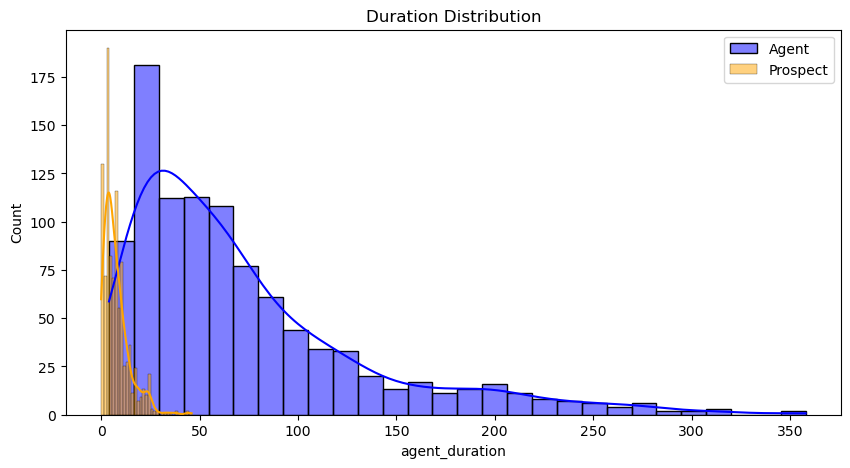

In [139]:
plt.figure(figsize=(10, 5))
snb.histplot(df_sec['agent_duration'], color='blue', label='Agent', kde=True)
snb.histplot(df_sec['prospect_duration'], color='orange', label='Prospect', kde=True)
plt.title("Duration Distribution")
plt.legend()
plt.show()

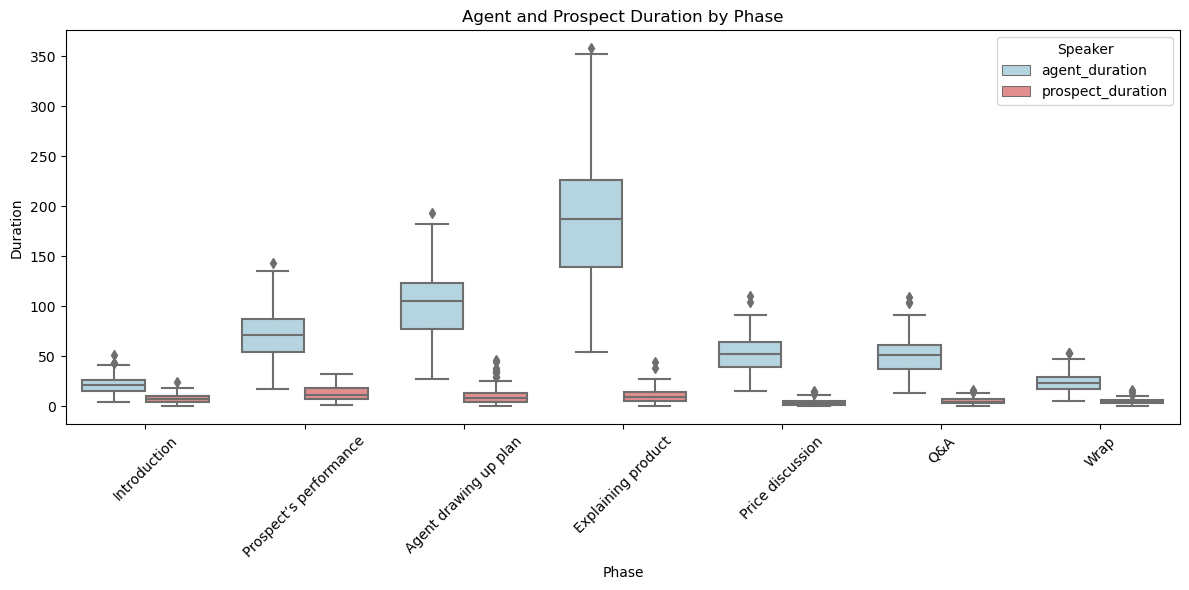

In [151]:
df_melted = df_sec.melt(
    id_vars='phase',
    value_vars=['agent_duration', 'prospect_duration'],
    var_name='speaker',
    value_name='duration'
)

plt.figure(figsize=(12, 6))
snb.boxplot(data=df_melted, x='phase', y='duration', hue='speaker',
            palette={'agent_duration': 'lightblue', 'prospect_duration': 'lightcoral'})

plt.title("Agent and Prospect Duration by Phase")
plt.xticks(rotation=45)
plt.xlabel('Phase')
plt.ylabel('Duration')
plt.legend(title='Speaker')
plt.tight_layout()
plt.show()

C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


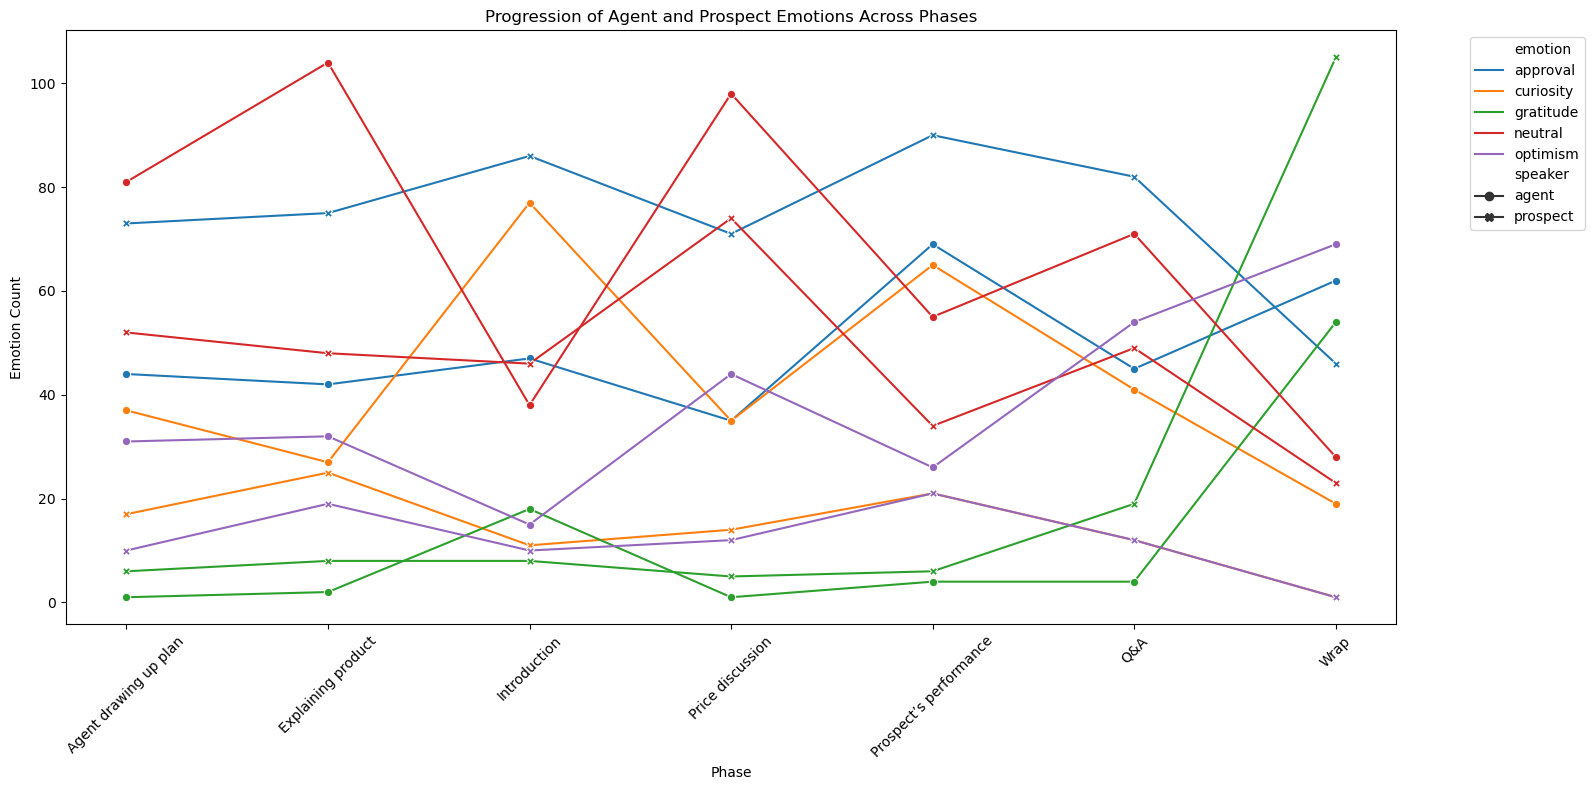

In [289]:
df_sec_mod = df_sec.copy()
df_sec_mod["agent_emotions"] = df_sec_mod["agent_emotions"].fillna("").apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])
df_sec_mod["prospect_emotions"] = df_sec_mod["prospect_emotions"].fillna("").apply(lambda x: [i.strip() for i in x.split(",") if i.strip()])

agent_emotions_long = df_sec_mod.explode("agent_emotions")[["phase", "agent_emotions"]].rename(columns={"agent_emotions": "emotion"})
agent_emotions_long["speaker"] = "agent"

prospect_emotions_long = df_sec_mod.explode("prospect_emotions")[["phase", "prospect_emotions"]].rename(columns={"prospect_emotions": "emotion"})
prospect_emotions_long["speaker"] = "prospect"

emotion_long = pd.concat([agent_emotions_long, prospect_emotions_long], ignore_index=True)

emotion_counts = emotion_long.groupby(["phase", "speaker", "emotion"]).size().reset_index(name="count")

import seaborn as snb
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

top_emotions = (
    emotion_counts.groupby("emotion")["count"].sum().sort_values(ascending=False).head(5).index.tolist()
)
filtered_counts = emotion_counts[emotion_counts["emotion"].isin(top_emotions)]

# Plot
snb.lineplot(
    data=filtered_counts,
    x="phase",
    y="count",
    hue="emotion",
    style="speaker",
    markers=True,
    dashes=False
)

plt.title("Progression of Agent and Prospect Emotions Across Phases")
plt.xlabel("Phase")
plt.ylabel("Emotion Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


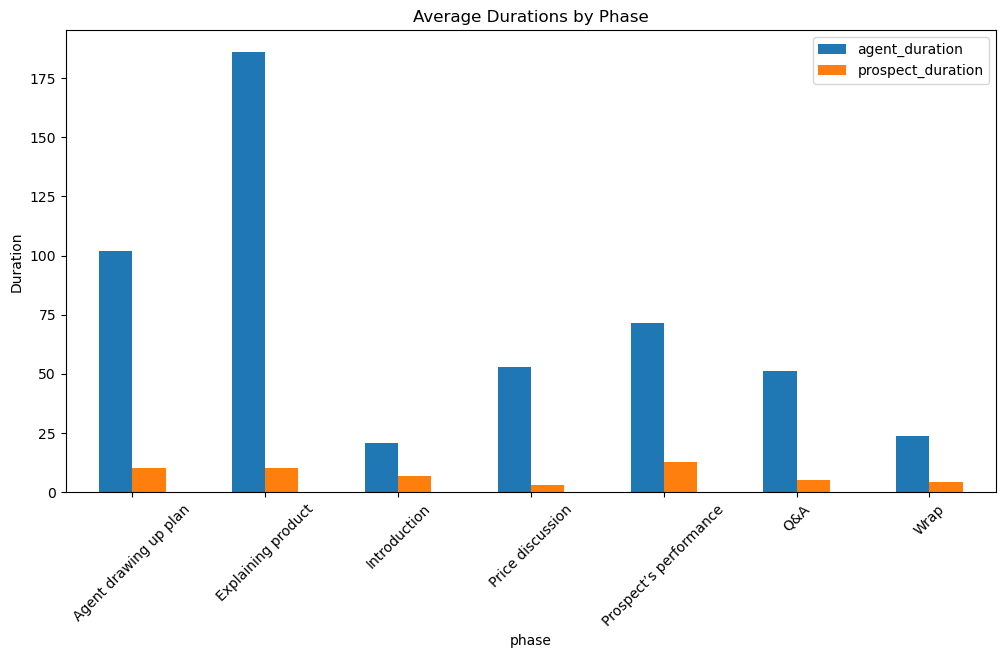

In [142]:
df_grouped = df_sec.groupby('phase')[['agent_duration', 'prospect_duration']].mean().reset_index()
df_grouped.plot(x='phase', kind='bar', stacked=False, figsize=(12, 6))
plt.title("Average Durations by Phase")
plt.xticks(rotation=45)
plt.ylabel("Duration")
plt.show()

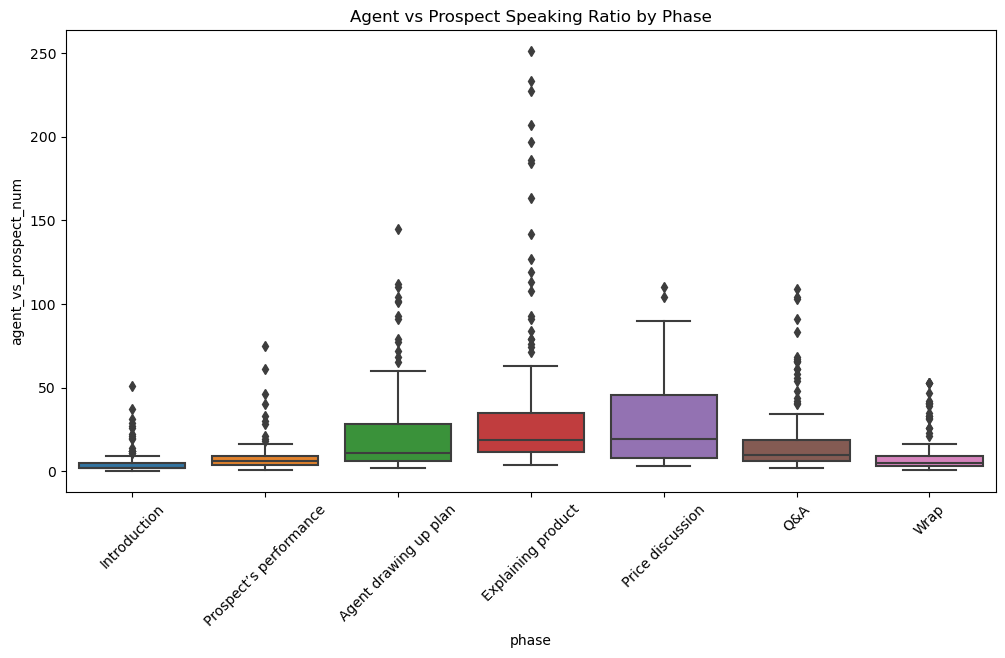

In [143]:
plt.figure(figsize=(12, 6))
snb.boxplot(data=df_sec, x='phase', y='agent_vs_prospect_num')
plt.title("Agent vs Prospect Speaking Ratio by Phase")
plt.xticks(rotation=45)
plt.show()

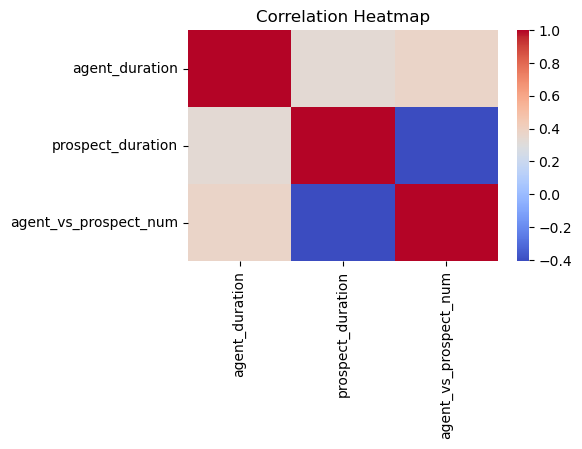

In [144]:
numeric_cols = df_sec.select_dtypes(include=np.number)
plt.figure(figsize=(5, 3))
snb.heatmap(numeric_cols.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

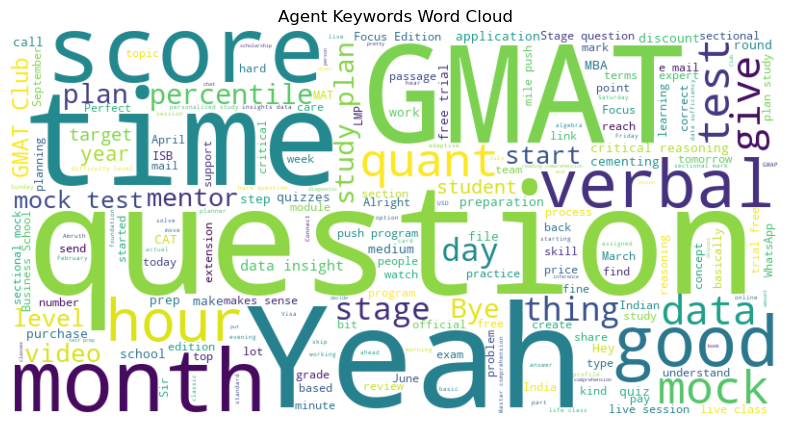

In [145]:
text = " ".join(df_sec['agent_keywords'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Agent Keywords Word Cloud")
plt.show()

### Conversion Analysis

In [242]:
df_conv = pd.read_csv("conversion_likelihood.csv")
df_conv.head()

,transcript_id,month,conversion_likelihood,reasoning,key_phases,prospect_keywords,emotions_detected,location,education,organization,date
0,100_20250213,Feb,0.50,Prospect showed positive emotions (more than 2...,"Q&A,Wrap","Electronics and Communication, engineering in ...","approval,gratitude,optimism,admiration,optimis...",India,"engineering, b.tech","PwC India, UPSC, Electronics and Communication...","7 to 8 months, 2021, 11 months"
1,101_20250212,Feb,0.62,Prospect showed positive emotion (hope or conf...,"Q&A,Wrap,Price discussion","engineer by profession, basically an engineer,...","gratitude,optimism,optimism",No Info,"masters, engineering","GMAT, CFA L1, GMAC, PMS",No Info
2,102_20250212,Feb,0.50,Prospect showed positive emotions (more than 2...,"Q&A,Wrap","quant, quant part, Yeah, quant session, part, ...","approval,gratitude,admiration,optimism",No Info,No Info,GMAT,No Info
3,103_20250212,Feb,0.00,No Info,No Info,"corporate finance, teaching corporate finance,...",No Info,"Rome, Milan",No Info,"IELTS, Business School, GMAT",No Info
4,104_20250212,Feb,0.62,Prospect showed positive emotions (more than 2...,"Q&A,Wrap,Price discussion","Yeah, business laptop, laptop, business, Amrut...","approval,gratitude,optimism",No Info,No Info,No Info,No Info


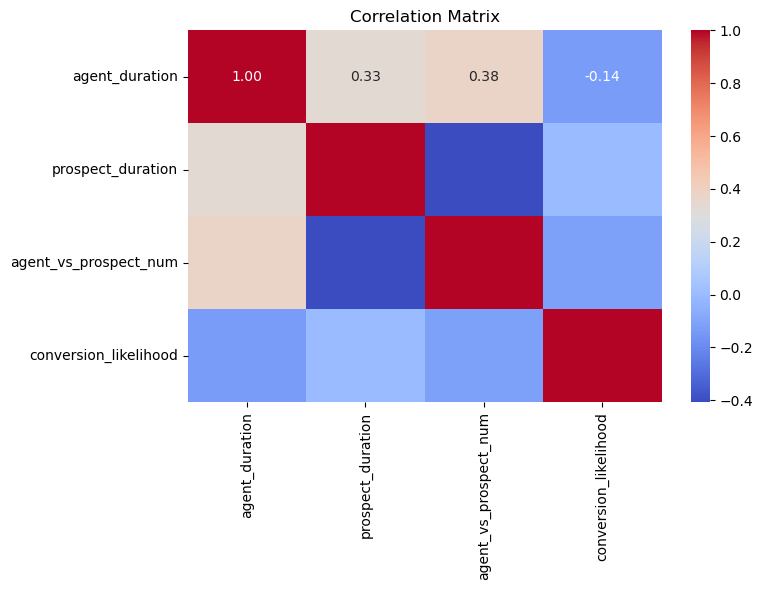

In [309]:
df_corr = pd.merge(df_sec[['transcript_id','agent_duration','prospect_duration','agent_vs_prospect_num']],
                   df_conv[['transcript_id','conversion_likelihood']], on='transcript_id', how='inner')
df_corr = df_corr.drop(['transcript_id'], axis=1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
snb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [310]:
correlation_matrix

,agent_duration,prospect_duration,agent_vs_prospect_num,conversion_likelihood
agent_duration,1.000000,0.330148,0.378166,-0.135295
prospect_duration,0.330148,1.000000,-0.407182,-0.004158
agent_vs_prospect_num,0.378166,-0.407182,1.000000,-0.116682
conversion_likelihood,-0.135295,-0.004158,-0.116682,1.000000


C:\GOWDATA\InstalledPrograms\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


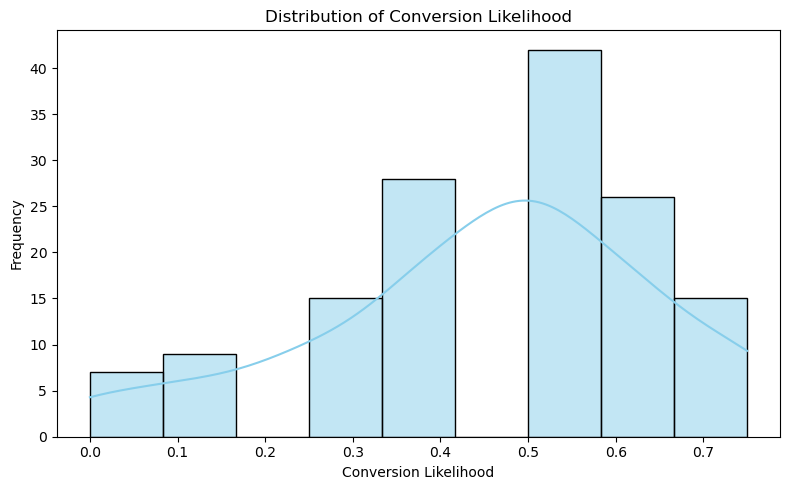

In [197]:
plt.figure(figsize=(8, 5))
snb.histplot(df_conv["conversion_likelihood"], kde=True, color="skyblue")
plt.title("Distribution of Conversion Likelihood")
plt.xlabel("Conversion Likelihood")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

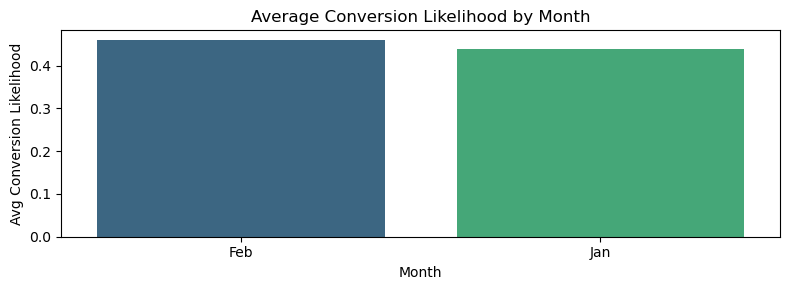

In [283]:
monthly_avg = df_conv.groupby("month")["conversion_likelihood"].mean().sort_index()

plt.figure(figsize=(8, 3))
snb.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="viridis")

plt.title("Average Conversion Likelihood by Month")
plt.xlabel("Month")
plt.ylabel("Avg Conversion Likelihood")
plt.tight_layout()
plt.show()

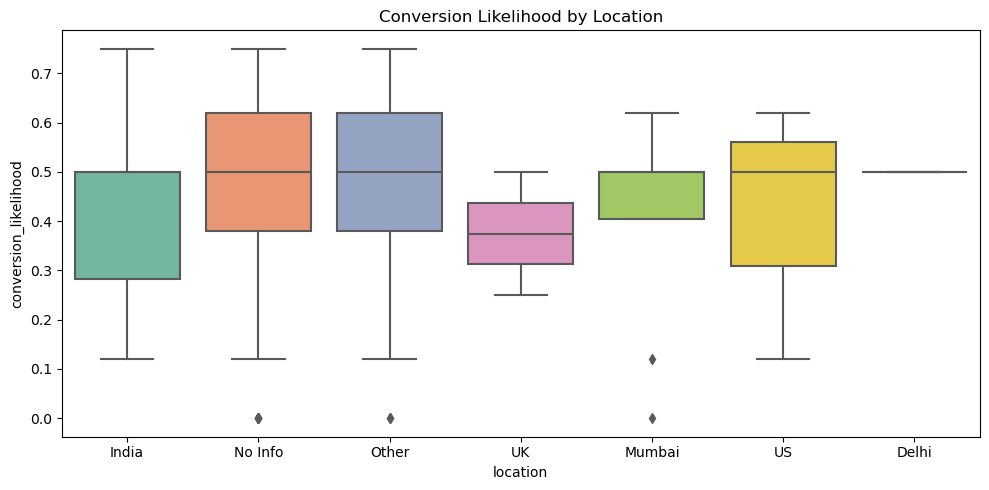

In [220]:
df_location = df_conv[["transcript_id", "location", "conversion_likelihood"]].copy()
df_location["location"] = df_location["location"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_location = df_location.explode("location")

location_counts = df_location['location'].value_counts()
common_locations = location_counts[location_counts > 1].index  # threshold can be adjusted

df_location['location'] = df_location['location'].apply(
    lambda x: x if x in common_locations else 'Other'
)

plt.figure(figsize=(10, 5))
snb.boxplot(data=df_location, x="location", y="conversion_likelihood", palette="Set2")
plt.title("Conversion Likelihood by Location")
plt.tight_layout()
plt.show()

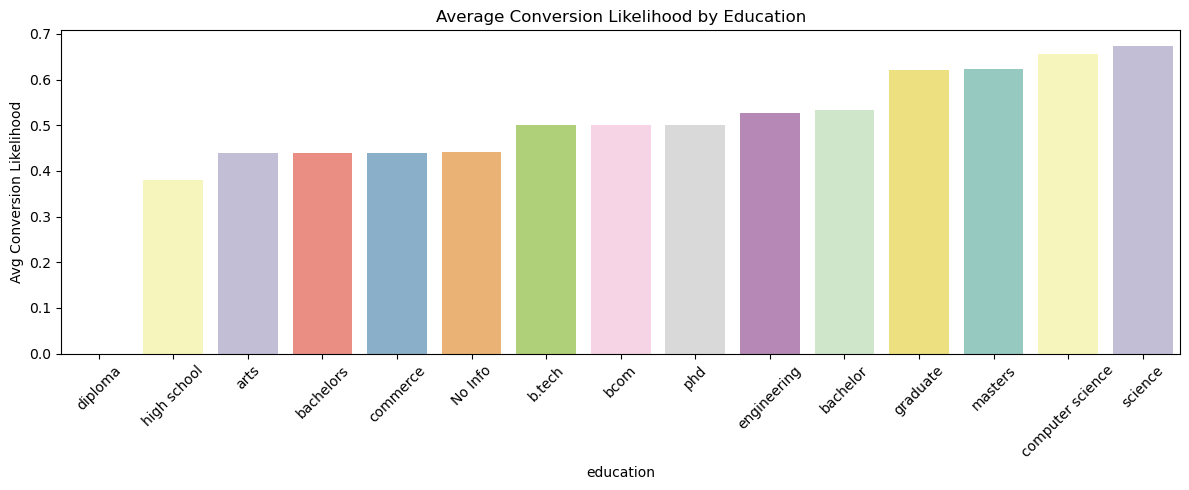

In [205]:
df_education = df_conv[["transcript_id", "education", "conversion_likelihood"]].copy()
df_education["education"] = df_education["education"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_education = df_education.explode("education")

plt.figure(figsize=(12, 5))
education_group = df_education.groupby("education")["conversion_likelihood"].mean().sort_values()
snb.barplot(x=education_group.index, y=education_group.values, palette="Set3")
plt.title("Average Conversion Likelihood by Education")
plt.ylabel("Avg Conversion Likelihood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

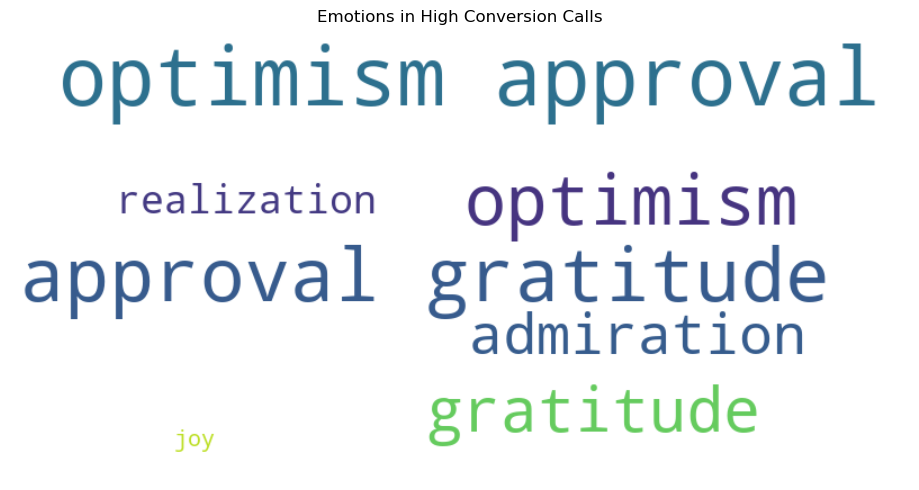

In [200]:
high_likelihood_emotions = df_conv[df_conv["conversion_likelihood"] > 0.5]["emotions_detected"].explode()
text = " ".join(high_likelihood_emotions.dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Emotions in High Conversion Calls")
plt.tight_layout()
plt.show()

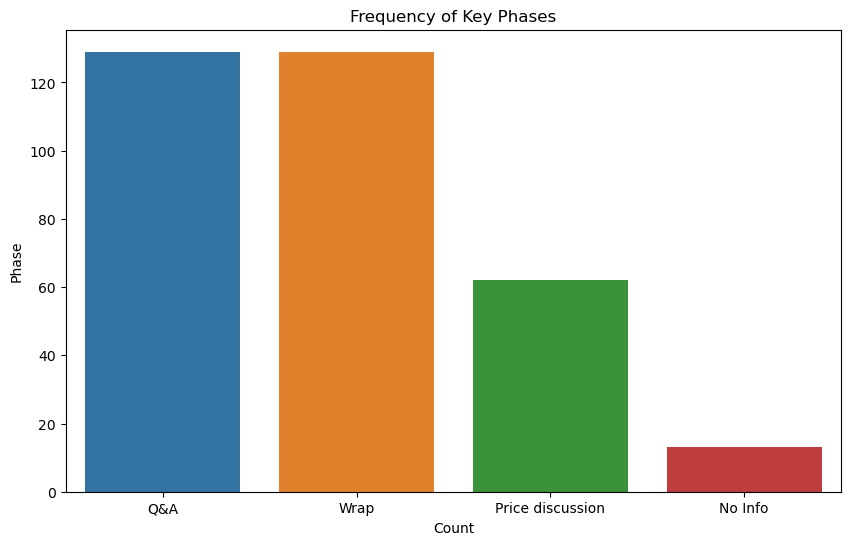

In [202]:
df_key_phases = df_conv[["transcript_id", "key_phases", "conversion_likelihood"]].copy()
df_key_phases["key_phases"] = df_key_phases["key_phases"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df_key_phases = df_key_phases.explode("key_phases")

plt.figure(figsize=(10, 6))
snb.countplot(data=df_key_phases, x="key_phases", order=df_key_phases["key_phases"].value_counts().index)
plt.title("Frequency of Key Phases")
plt.xlabel("Count")
plt.ylabel("Phase")
plt.show()

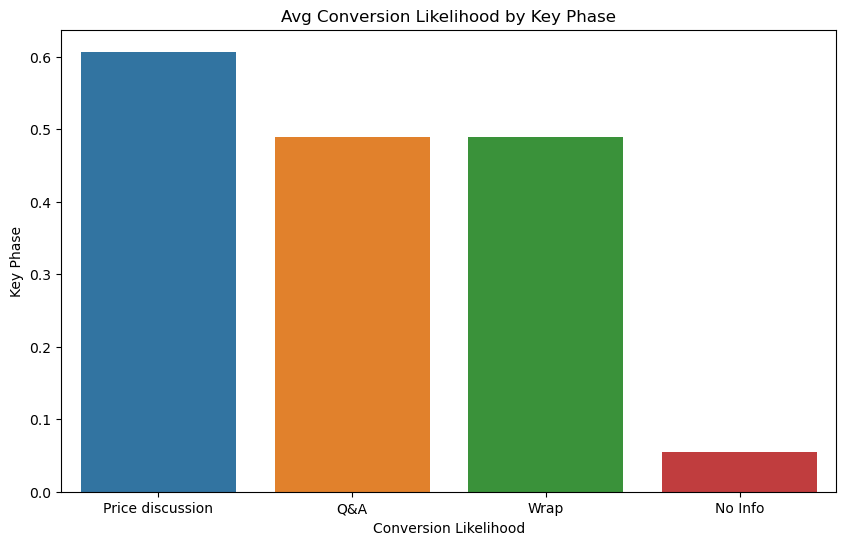

In [203]:
mean_likelihood = df_key_phases.groupby("key_phases")["conversion_likelihood"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
snb.barplot(y=mean_likelihood.values, x=mean_likelihood.index)
plt.title("Avg Conversion Likelihood by Key Phase")
plt.xlabel("Conversion Likelihood")
plt.ylabel("Key Phase")
plt.show()